In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
df = pd.read_csv("2018.csv")
print(df)

             Date Country     City Specie  count   min   max  median  variance
0       4/19/2018      HR   Zagreb   pm10     72  12.0  66.0    19.0   1034.64
1        5/3/2018      HR   Zagreb   pm10     72   5.0  46.0    20.0    740.53
2        5/8/2018      HR   Zagreb   pm10     69   7.0  33.0    17.0    286.35
3       5/31/2018      HR   Zagreb   pm10     48  15.0  60.0    25.0    704.61
4       6/22/2018      HR   Zagreb   pm10     62   1.0  60.0     7.0    670.06
...           ...     ...      ...    ...    ...   ...   ...     ...       ...
552435  3/26/2018      IN  Kolkata    no2     24   3.8   5.9     4.6      2.68
552436   3/3/2018      IN  Kolkata    no2     24   4.8  10.8     5.8     21.75
552437  5/30/2018      IN  Kolkata    no2     13   0.8   2.5     1.8      2.46
552438  6/26/2018      IN  Kolkata    no2     21   0.7   5.6     2.3     13.97
552439  6/27/2018      IN  Kolkata    no2     23   0.4   4.8     2.3     11.63

[552440 rows x 9 columns]


In [4]:
df.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,4/19/2018,HR,Zagreb,pm10,72,12.0,66.0,19.0,1034.64
1,5/3/2018,HR,Zagreb,pm10,72,5.0,46.0,20.0,740.53
2,5/8/2018,HR,Zagreb,pm10,69,7.0,33.0,17.0,286.35
3,5/31/2018,HR,Zagreb,pm10,48,15.0,60.0,25.0,704.61
4,6/22/2018,HR,Zagreb,pm10,62,1.0,60.0,7.0,670.06


In [5]:
df.describe()

,count,min,max,median,variance
count,552440.000000,552440.000000,552440.000000,552440.000000,5.524400e+05
mean,127.401580,46.090060,87.274302,60.683923,6.718930e+03
std,186.312856,188.876378,199.101531,189.196854,1.023512e+05
min,2.000000,-3065.600000,-52.900000,-549.600000,0.000000e+00
25%,44.000000,1.000000,12.200000,4.300000,3.648000e+01
50%,72.000000,3.100000,33.000000,14.000000,2.920950e+02
75%,146.000000,13.000000,70.000000,33.000000,1.286197e+03
max,2779.000000,1229.000000,3078.800000,1434.500000,1.443690e+07


In [6]:
species = df["Specie"]
species.values

array(['pm10', 'pm10', 'pm10', ..., 'no2', 'no2', 'no2'], dtype=object)

In [7]:
species.unique()

array(['pm10', 'temperature', 'wind-speed', 'wind-gust', 'co', 'o3',
       'so2', 'no2', 'humidity', 'pressure', 'pm25', 'precipitation',
       'wd', 'd', 'uvi', 'aqi', 'pol', 'pm1', 'mepaqi'], dtype=object)

# Chennai

In [8]:
chennai = df[df['City'] == 'Chennai']
chennai.head()

,Date,Country,City,Specie,count,min,max,median,variance
542590,6/11/2018,IN,Chennai,pressure,72,0.0,1005.0,0.0,2267540.0
542591,5/19/2018,IN,Chennai,pressure,69,0.0,1007.0,0.0,2325260.0
542592,5/29/2018,IN,Chennai,pressure,73,0.0,1003.0,0.0,2241080.0
542593,5/24/2018,IN,Chennai,pressure,71,0.0,1006.0,0.0,2291040.0
542594,5/28/2018,IN,Chennai,pressure,71,0.0,1016.6,0.0,2312180.0


In [9]:
pm = chennai[chennai['Specie'] == 'co'].copy() 
pm.head()

,Date,Country,City,Specie,count,min,max,median,variance
542637,1/26/2018,IN,Chennai,co,96,2.8,20.3,7.0,185.10
542638,3/18/2018,IN,Chennai,co,92,2.4,18.8,8.7,178.92
542639,4/7/2018,IN,Chennai,co,48,2.8,9.3,5.1,22.48
542640,4/20/2018,IN,Chennai,co,48,3.1,14.2,6.9,52.57
542641,6/26/2018,IN,Chennai,co,48,2.2,13.4,6.5,61.01


In [10]:
pm = pd.pivot_table(data=pm, values=['min', 'max', 'median'], index='Date')
pm.head()

,max,median,min
Date,,,
1/1/2018,21.7,9.3,2.9
1/10/2018,31.1,9.3,2.4
1/11/2018,21.7,9.4,2.4
1/12/2018,21.7,10.1,2.4
1/13/2018,29.7,12.4,2.2


In [11]:
pm.rename(columns={'min':'min_{}'.format('pm10'), 'max':'max_{}'.format('pm10'), 'median':'avg_{}'.format('pm10')}, inplace=True)
pm.head()

,max_pm10,avg_pm10,min_pm10
Date,,,
1/1/2018,21.7,9.3,2.9
1/10/2018,31.1,9.3,2.4
1/11/2018,21.7,9.4,2.4
1/12/2018,21.7,10.1,2.4
1/13/2018,29.7,12.4,2.2


In [12]:
def cleaning_function(df, city, parameters):
    #This function will make all the cleaning process
    #df is each DataFrame (df18, df19, df20)
    #City we will use
    #Parameters or environmental variables, we will take from each dataframe based
    #on it's available variables

    #Basic idea:
    #1. Extracts the city
    #2. From the list of parameters, extracts each parameter
    #3. From that parameter makes a pivot, and change columns names
    #4. Takes each parameter df and merges it with an empty df
    #5. Return that new DataFrame

    city_temp = df[df['City'] == city]
    city_temp_parameters = city_temp['Specie'].unique()
    final_df = pd.DataFrame()
    for parameter in parameters:
        if parameter not in city_temp_parameters:
            print("The parameter {} doesn't exist in the dataframe and will be ignored".format(parameter))
            continue
        else:
            temp_df = city_temp[city_temp['Specie'] == parameter].copy()
            temp_df_pivot = pd.pivot_table(data=temp_df, values=['min', 'max', 'median'], index='Date')
            temp_df_pivot.rename(columns={'min':'min_{}'.format(parameter), 'max':'max_{}'.format(parameter), 'median':'avg_{}'.format(parameter)}, inplace=True)
            final_df = pd.concat([final_df, temp_df_pivot], axis=1)
    return final_df

In [13]:
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
chennai_18 = cleaning_function(df, 'Chennai', parameters)
chennai_18.head()

The parameter pm10 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,avg_o3,min_o3,max_so2,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
1/1/2018,180.0,129.0,56.0,21.7,9.3,2.9,35.4,10.2,1.3,37.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/10/2018,231.0,157.0,76.0,31.1,9.3,2.4,19.2,7.0,1.7,45.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/11/2018,345.0,161.0,99.0,21.7,9.4,2.4,34.3,6.1,2.1,52.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/12/2018,275.0,159.0,109.0,21.7,10.1,2.4,73.5,5.7,1.7,53.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/13/2018,834.0,157.0,75.0,29.7,12.4,2.2,40.9,4.4,1.7,92.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
list(chennai_18.columns)

['max_pm25',
 'avg_pm25',
 'min_pm25',
 'max_co',
 'avg_co',
 'min_co',
 'max_o3',
 'avg_o3',
 'min_o3',
 'max_so2',
 'avg_so2',
 'min_so2',
 'max_no2',
 'avg_no2',
 'min_no2',
 'max_humidity',
 'avg_humidity',
 'min_humidity',
 'max_pressure',
 'avg_pressure',
 'min_pressure',
 'max_temperature',
 'avg_temperature',
 'min_temperature',
 'max_wind-speed',
 'avg_wind-speed',
 'min_wind-speed']

In [15]:
chennai_18.isnull().sum()

max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity       130
avg_humidity       130
min_humidity       130
max_pressure       135
avg_pressure       135
min_pressure       135
max_temperature    135
avg_temperature    135
min_temperature    135
max_wind-speed     130
avg_wind-speed     130
min_wind-speed     130
dtype: int64

In [16]:
chennai_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)

In [17]:
def missingvalue_function(city):
    city_noNan_foward = city.interpolate(method='linear',axis=1, limit_direction='forward')
    city_noNan_all = city_noNan_foward.interpolate(method='linear',axis=1,limit_direction='backward')
    #city_noNan_all.astype(int)
    return city_noNan_all

In [18]:
chennai_18 = missingvalue_function(chennai_18)
chennai_18.isnull().sum()

max_pm25    0
avg_pm25    0
min_pm25    0
max_co      0
avg_co      0
min_co      0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

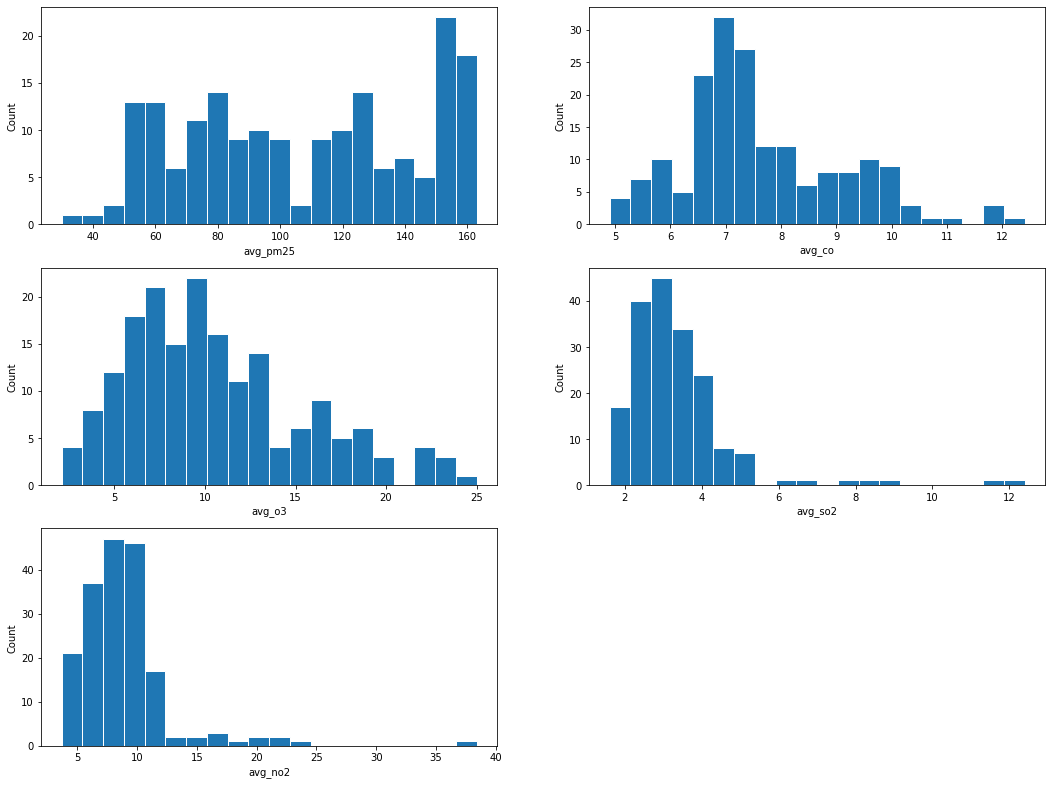

In [19]:
cols=['avg_pm25', 'avg_co', 'avg_o3', 'avg_so2', 'avg_no2']

fig=plt.figure(figsize=(18, 28))

for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    plt.hist(chennai_18[col].dropna(),bins=20,edgecolor='white')
    plt.xlabel(col)
    plt.ylabel('Count')

Text(0.5, 1.0, 'Correlation Analysis')

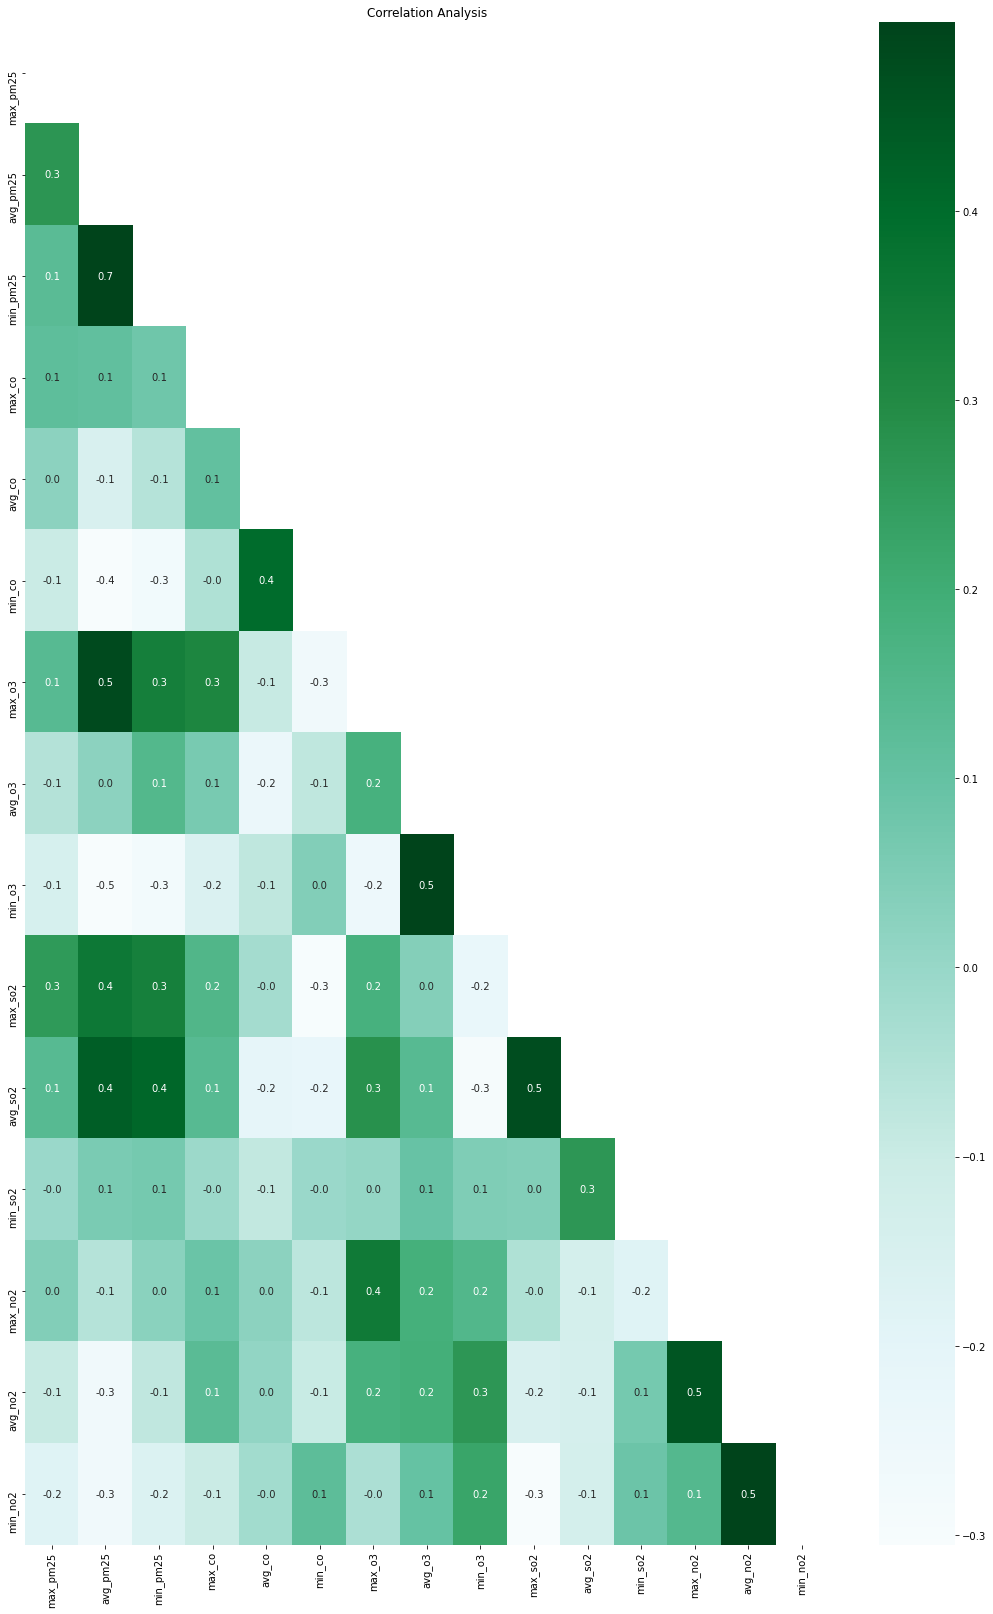

In [20]:
plt.figure(figsize=(18,28))

mask=np.triu(chennai_18.corr(method='pearson'))
sns.heatmap(chennai_18.corr(method='pearson'),
            annot=True,fmt='0.1f',
            mask=mask,
            robust=True,
            cmap='BuGn')
plt.title('Correlation Analysis')

Text(0.5, 0, 'Features')

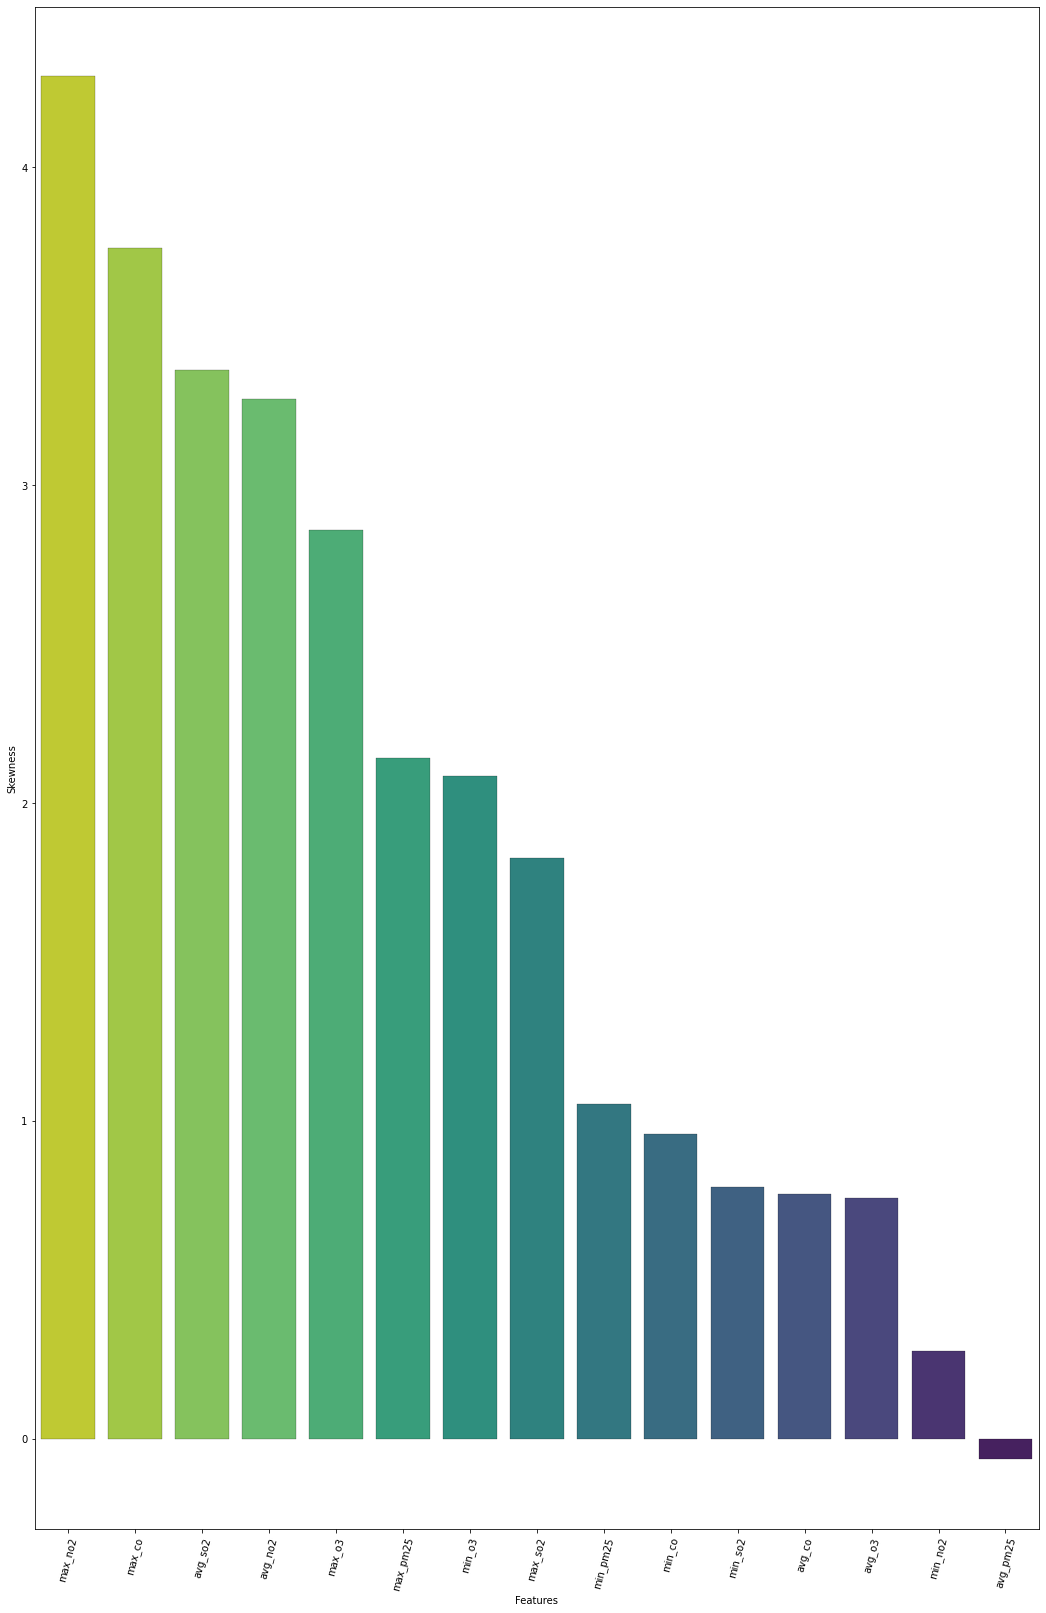

In [21]:
skew=pd.DataFrame(chennai_18.skew().sort_values(ascending=False))
skew.columns=['Skewness']

plt.figure(figsize=(18,28))
plt.xticks(rotation=75)
sns.barplot(x=skew.index,y='Skewness',data=skew,
            edgecolor='black',
            linewidth=0.2,
            palette='viridis_r')
plt.xlabel('Features')

# Delhi

In [22]:
delhi = df[df['City'] == 'Delhi']
delhi.head()

,Date,Country,City,Specie,count,min,max,median,variance
537508,5/8/2018,IN,Delhi,o3,404,1.8,91.5,25.0,2491.89
537509,2/15/2018,IN,Delhi,o3,690,0.3,95.7,9.0,2251.63
537510,3/24/2018,IN,Delhi,o3,692,0.2,124.2,13.7,3101.66
537511,4/26/2018,IN,Delhi,o3,458,0.2,131.6,10.1,11191.30
537512,3/27/2018,IN,Delhi,o3,635,0.5,137.5,8.4,3852.37


In [23]:
pm = delhi[delhi['Specie'] == 'co'].copy() 
pm.head()

,Date,Country,City,Specie,count,min,max,median,variance
538084,1/29/2018,IN,Delhi,co,531,0.1,49.7,8.2,992.68
538085,6/11/2018,IN,Delhi,co,553,0.1,64.7,7.2,317.13
538086,6/15/2018,IN,Delhi,co,563,0.1,28.5,4.2,161.02
538087,2/3/2018,IN,Delhi,co,666,0.1,41.2,5.9,504.41
538088,1/9/2018,IN,Delhi,co,400,0.1,291.6,1.3,3572.80


In [24]:
pm = pd.pivot_table(data=pm, values=['min', 'max', 'median'], index='Date')
pm.head()

,max,median,min
Date,,,
1/1/2018,98.5,5.1,0.1
1/10/2018,55.7,4.3,0.1
1/11/2018,77.0,4.8,0.1
1/12/2018,352.1,3.9,0.1
1/13/2018,135.5,6.2,0.1


In [25]:
pm.rename(columns={'min':'min_{}'.format('pm10'), 'max':'max_{}'.format('pm10'), 'median':'avg_{}'.format('pm10')}, inplace=True)
pm.head()

,max_pm10,avg_pm10,min_pm10
Date,,,
1/1/2018,98.5,5.1,0.1
1/10/2018,55.7,4.3,0.1
1/11/2018,77.0,4.8,0.1
1/12/2018,352.1,3.9,0.1
1/13/2018,135.5,6.2,0.1


In [26]:
delhi_18 = cleaning_function(df, 'Delhi', parameters)
delhi_18.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed,max_wd,avg_wd,min_wd
1/1/2018,889.0,302.0,40.0,999.0,342.0,81.0,98.5,5.1,0.1,147.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/10/2018,999.0,167.0,80.0,510.0,218.0,118.0,55.7,4.3,0.1,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/11/2018,777.0,146.0,20.0,420.0,193.0,53.0,77.0,4.8,0.1,94.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/12/2018,891.0,158.0,84.0,586.0,198.0,112.0,352.1,3.9,0.1,98.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/13/2018,885.0,210.0,58.0,824.0,255.0,48.0,135.5,6.2,0.1,157.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
list(delhi_18.columns)

['max_pm10',
 'avg_pm10',
 'min_pm10',
 'max_pm25',
 'avg_pm25',
 'min_pm25',
 'max_co',
 'avg_co',
 'min_co',
 'max_o3',
 'avg_o3',
 'min_o3',
 'max_so2',
 'avg_so2',
 'min_so2',
 'max_no2',
 'avg_no2',
 'min_no2',
 'max_humidity',
 'avg_humidity',
 'min_humidity',
 'max_pressure',
 'avg_pressure',
 'min_pressure',
 'max_temperature',
 'avg_temperature',
 'min_temperature',
 'max_wind-speed',
 'avg_wind-speed',
 'min_wind-speed',
 'max_wd',
 'avg_wd',
 'min_wd']

In [28]:
delhi_18.isnull().sum()

max_pm10             0
avg_pm10             0
min_pm10             0
max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity       121
avg_humidity       121
min_humidity       121
max_pressure       121
avg_pressure       121
min_pressure       121
max_temperature    121
avg_temperature    121
min_temperature    121
max_wind-speed     120
avg_wind-speed     120
min_wind-speed     120
max_wd             133
avg_wd             133
min_wd             133
dtype: int64

In [29]:
delhi_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)

In [30]:
delhi_18 = missingvalue_function(delhi_18)
delhi_18.isnull().sum()

max_pm10    0
avg_pm10    0
min_pm10    0
max_pm25    0
avg_pm25    0
min_pm25    0
max_co      0
avg_co      0
min_co      0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
max_wd      0
avg_wd      0
min_wd      0
dtype: int64

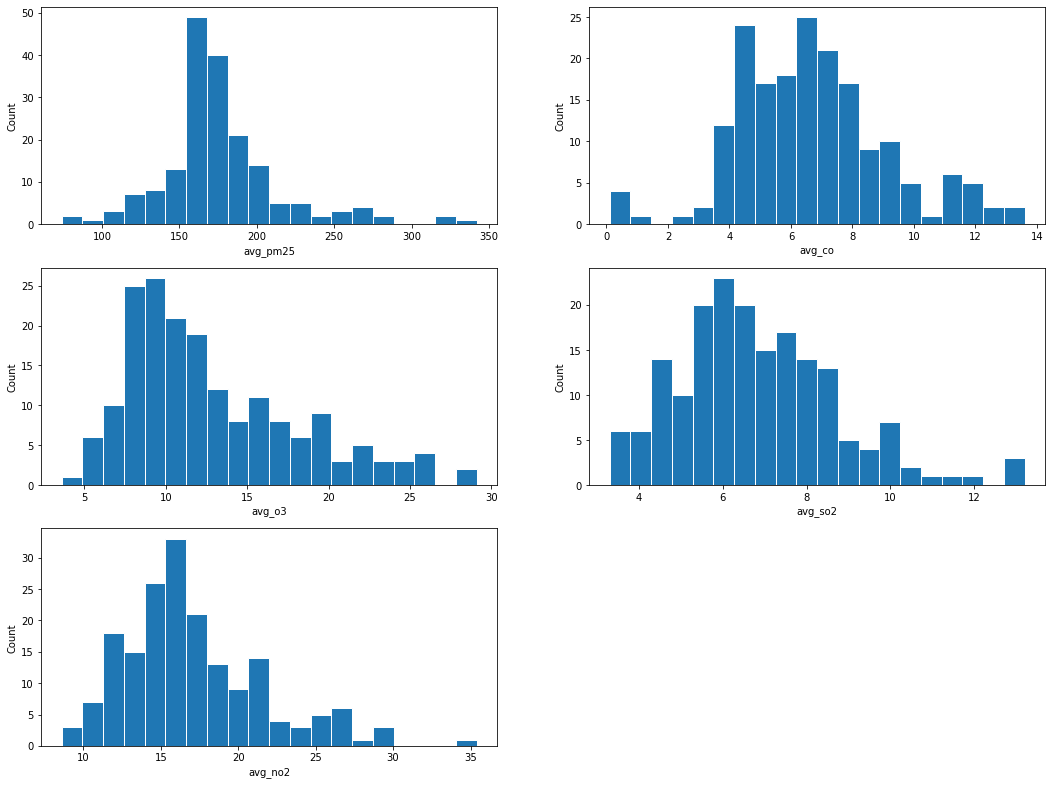

In [31]:
cols=['avg_pm25', 'avg_co', 'avg_o3', 'avg_so2', 'avg_no2']

fig=plt.figure(figsize=(18, 28))

for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    plt.hist(delhi_18[col].dropna(),bins=20,edgecolor='white')
    plt.xlabel(col)
    plt.ylabel('Count')

Text(0.5, 1.0, 'Correlation Analysis')

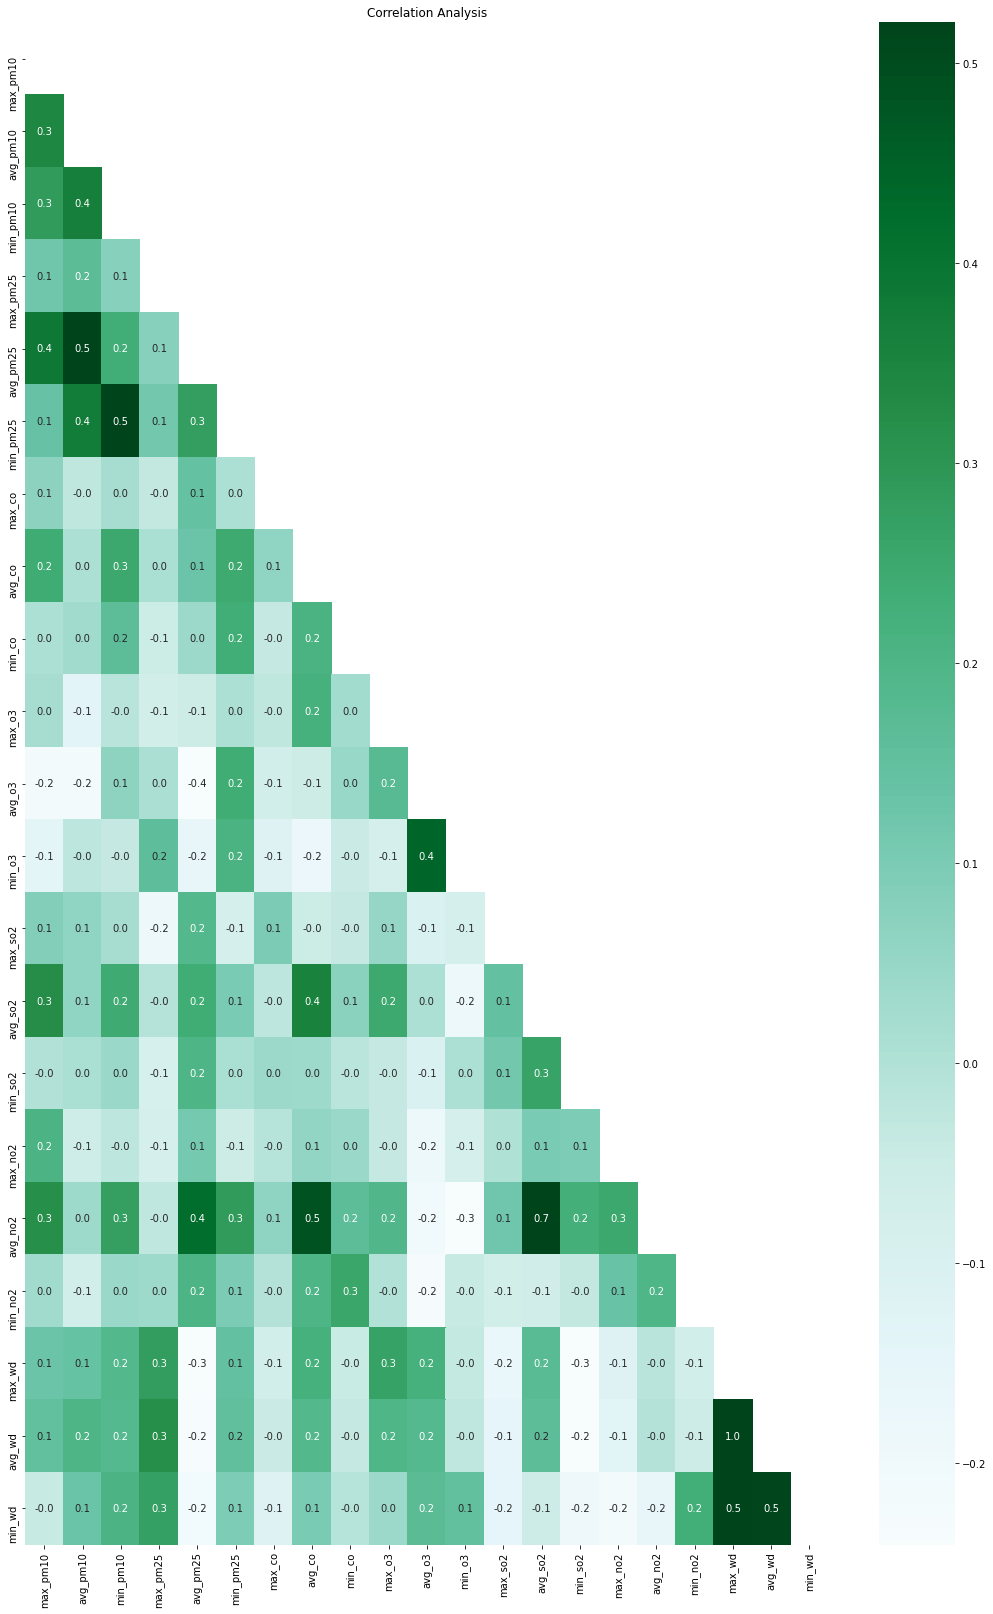

In [32]:
plt.figure(figsize=(18,28))

mask=np.triu(delhi_18.corr(method='pearson'))
sns.heatmap(delhi_18.corr(method='pearson'),
            annot=True,fmt='0.1f',
            mask=mask,
            robust=True,
            cmap='BuGn')
plt.title('Correlation Analysis')

Text(0.5, 0, 'Features')

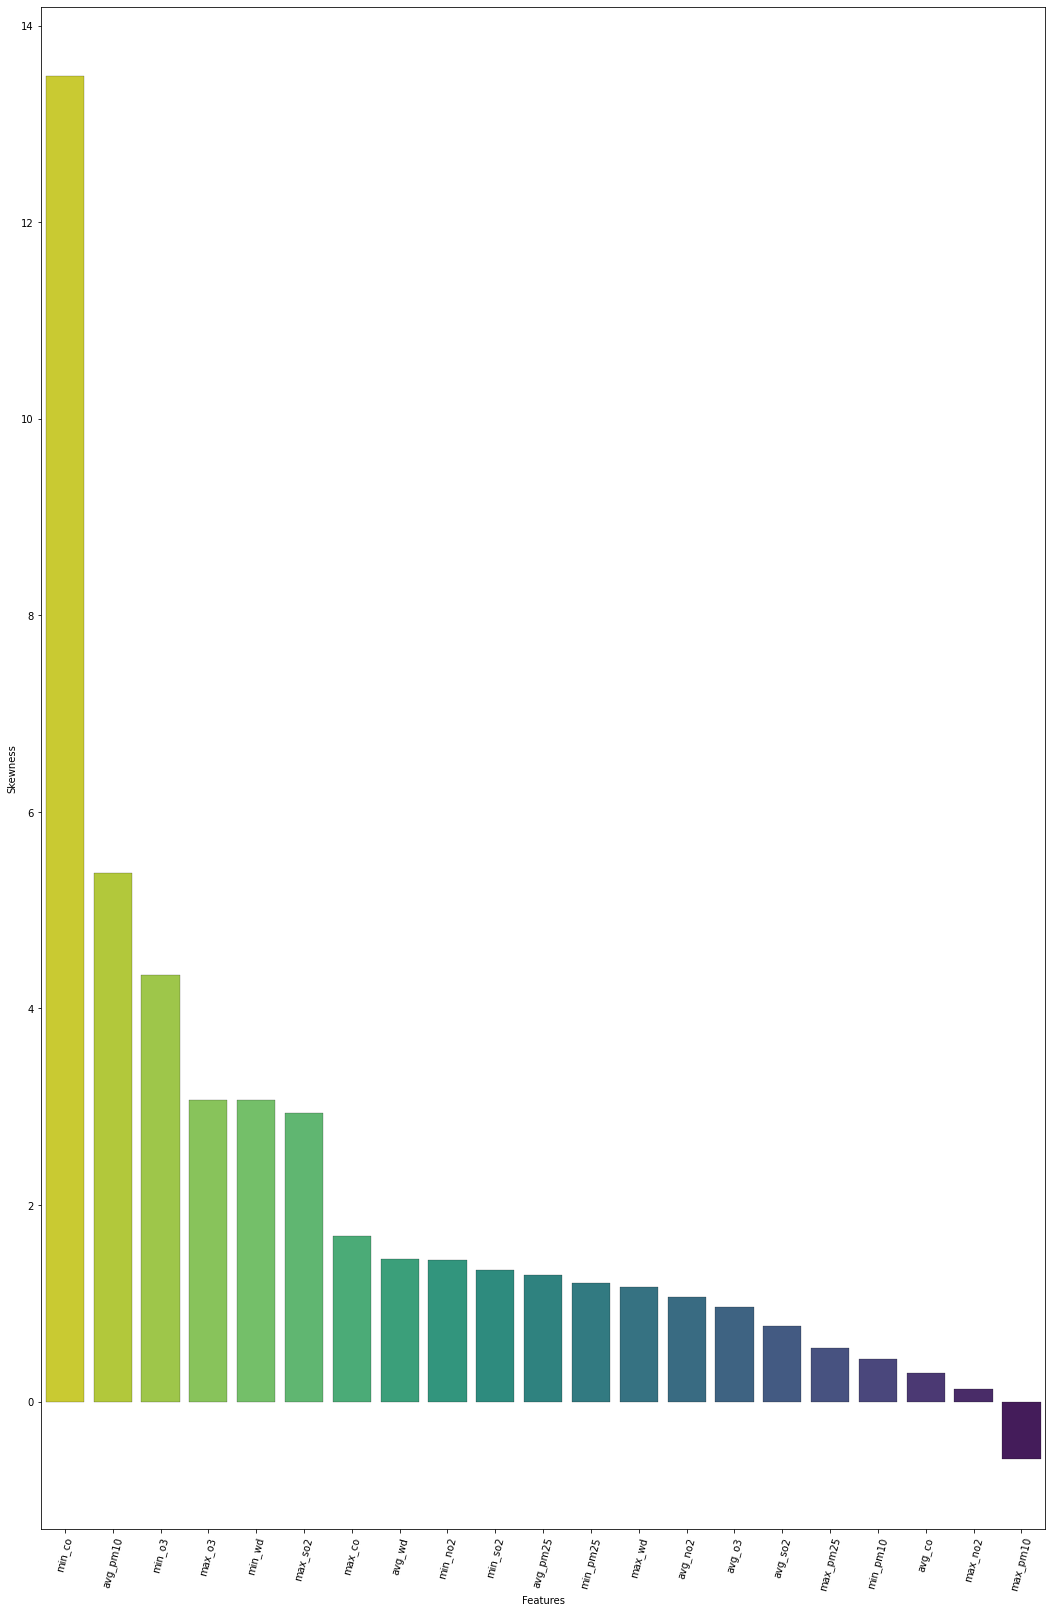

In [33]:
skew=pd.DataFrame(delhi_18.skew().sort_values(ascending=False))
skew.columns=['Skewness']

plt.figure(figsize=(18,28))
plt.xticks(rotation=75)
sns.barplot(x=skew.index,y='Skewness',data=skew,
            edgecolor='black',
            linewidth=0.2,
            palette='viridis_r')
plt.xlabel('Features')

# Mumbai

In [34]:
mumbai = df[df['City'] == 'Mumbai']
mumbai.head()

,Date,Country,City,Specie,count,min,max,median,variance
545601,1/4/2018,IN,Mumbai,no2,48,6.6,46.7,21.3,1445.27
545602,1/14/2018,IN,Mumbai,no2,41,0.4,101.2,18.0,8010.03
545603,1/22/2018,IN,Mumbai,no2,28,1.1,119.2,17.6,8486.31
545604,2/17/2018,IN,Mumbai,no2,26,3.3,103.4,10.3,3712.03
545605,4/16/2018,IN,Mumbai,no2,45,1.9,58.4,14.7,4116.75


In [35]:
pm = mumbai[mumbai['Specie'] == 'co'].copy() 
pm.head()

,Date,Country,City,Specie,count,min,max,median,variance
546573,3/9/2018,IN,Mumbai,co,69,2.0,27.5,17.2,258.53
546574,5/15/2018,IN,Mumbai,co,24,14.1,17.1,15.0,12.73
546575,2/16/2018,IN,Mumbai,co,72,6.6,42.7,21.0,1079.96
546576,1/14/2018,IN,Mumbai,co,61,1.5,31.8,17.8,488.94
546577,1/25/2018,IN,Mumbai,co,69,6.9,62.3,13.7,2207.98


In [36]:
pm = pd.pivot_table(data=pm, values=['min', 'max', 'median'], index='Date')
pm.head()

,max,median,min
Date,,,
1/1/2018,86.4,13.7,0.8
1/10/2018,41.2,17.5,0.6
1/11/2018,35.5,17.6,1.0
1/12/2018,53.2,17.8,2.6
1/13/2018,28.2,17.9,8.9


In [37]:
pm.rename(columns={'min':'min_{}'.format('pm10'), 'max':'max_{}'.format('pm10'), 'median':'avg_{}'.format('pm10')}, inplace=True)
pm.head()

,max_pm10,avg_pm10,min_pm10
Date,,,
1/1/2018,86.4,13.7,0.8
1/10/2018,41.2,17.5,0.6
1/11/2018,35.5,17.6,1.0
1/12/2018,53.2,17.8,2.6
1/13/2018,28.2,17.9,8.9


In [38]:
mumbai_18 = cleaning_function(df, 'Mumbai', parameters)
mumbai_18.head()

The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm10,avg_pm10,min_pm10,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
1/1/2018,198.0,104.0,31.0,305.0,166.0,10.0,86.4,13.7,0.8,53.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/10/2018,254.0,122.0,58.0,312.0,163.0,59.0,41.2,17.5,0.6,49.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/11/2018,191.0,110.0,58.0,236.0,165.0,93.0,35.5,17.6,1.0,73.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/12/2018,232.0,113.0,46.0,257.0,170.0,138.0,53.2,17.8,2.6,45.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/13/2018,171.0,106.0,61.0,200.0,162.0,126.0,28.2,17.9,8.9,65.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
list(mumbai_18.columns)

['max_pm10',
 'avg_pm10',
 'min_pm10',
 'max_pm25',
 'avg_pm25',
 'min_pm25',
 'max_co',
 'avg_co',
 'min_co',
 'max_o3',
 'avg_o3',
 'min_o3',
 'max_so2',
 'avg_so2',
 'min_so2',
 'max_no2',
 'avg_no2',
 'min_no2',
 'max_humidity',
 'avg_humidity',
 'min_humidity',
 'max_pressure',
 'avg_pressure',
 'min_pressure',
 'max_temperature',
 'avg_temperature',
 'min_temperature',
 'max_wind-speed',
 'avg_wind-speed',
 'min_wind-speed']

In [40]:
mumbai_18.isnull().sum()

max_pm10            11
avg_pm10            11
min_pm10            11
max_pm25             5
avg_pm25             5
min_pm25             5
max_co              11
avg_co              11
min_co              11
max_o3              72
avg_o3              72
min_o3              72
max_so2             11
avg_so2             11
min_so2             11
max_no2             72
avg_no2             72
min_no2             72
max_humidity       129
avg_humidity       129
min_humidity       129
max_pressure       129
avg_pressure       129
min_pressure       129
max_temperature    129
avg_temperature    129
min_temperature    129
max_wind-speed     135
avg_wind-speed     135
min_wind-speed     135
dtype: int64

In [41]:
mumbai_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)

In [42]:
mumbai_18 = missingvalue_function(mumbai_18)
mumbai_18.isnull().sum()

max_pm10    0
avg_pm10    0
min_pm10    0
max_pm25    0
avg_pm25    0
min_pm25    0
max_co      0
avg_co      0
min_co      0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

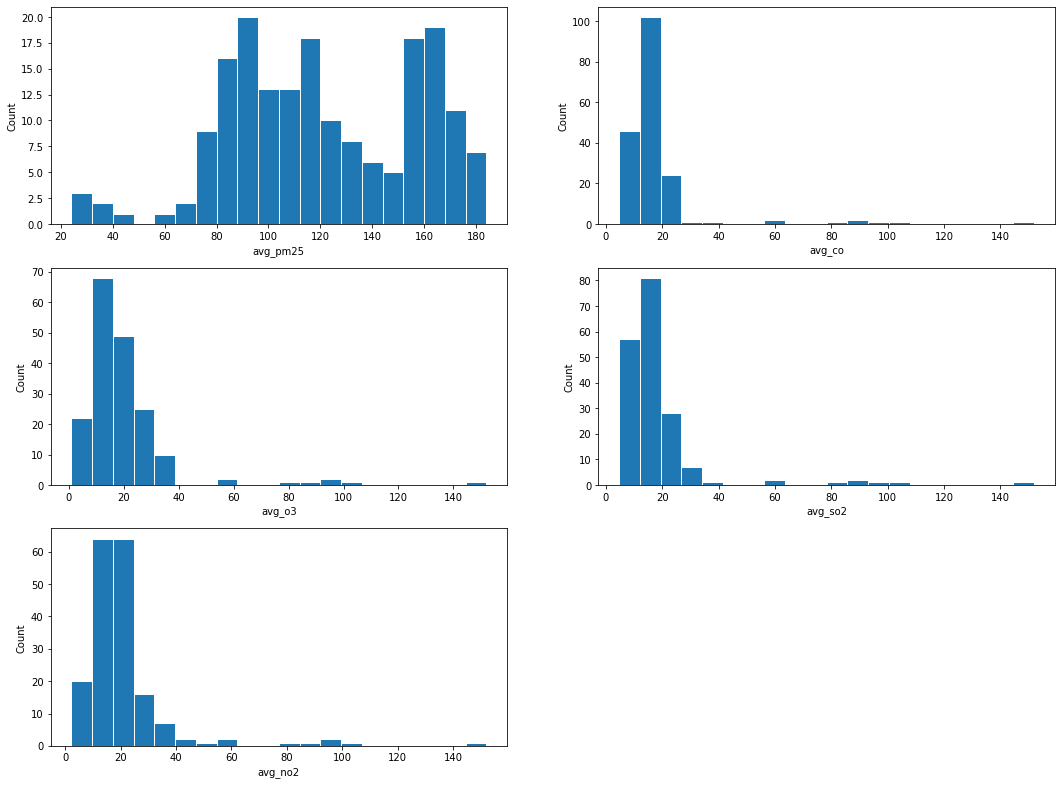

In [43]:
cols=['avg_pm25', 'avg_co', 'avg_o3', 'avg_so2', 'avg_no2']

fig=plt.figure(figsize=(18, 28))

for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    plt.hist(mumbai_18[col].dropna(),bins=20,edgecolor='white')
    plt.xlabel(col)
    plt.ylabel('Count')

Text(0.5, 1.0, 'Correlation Analysis')

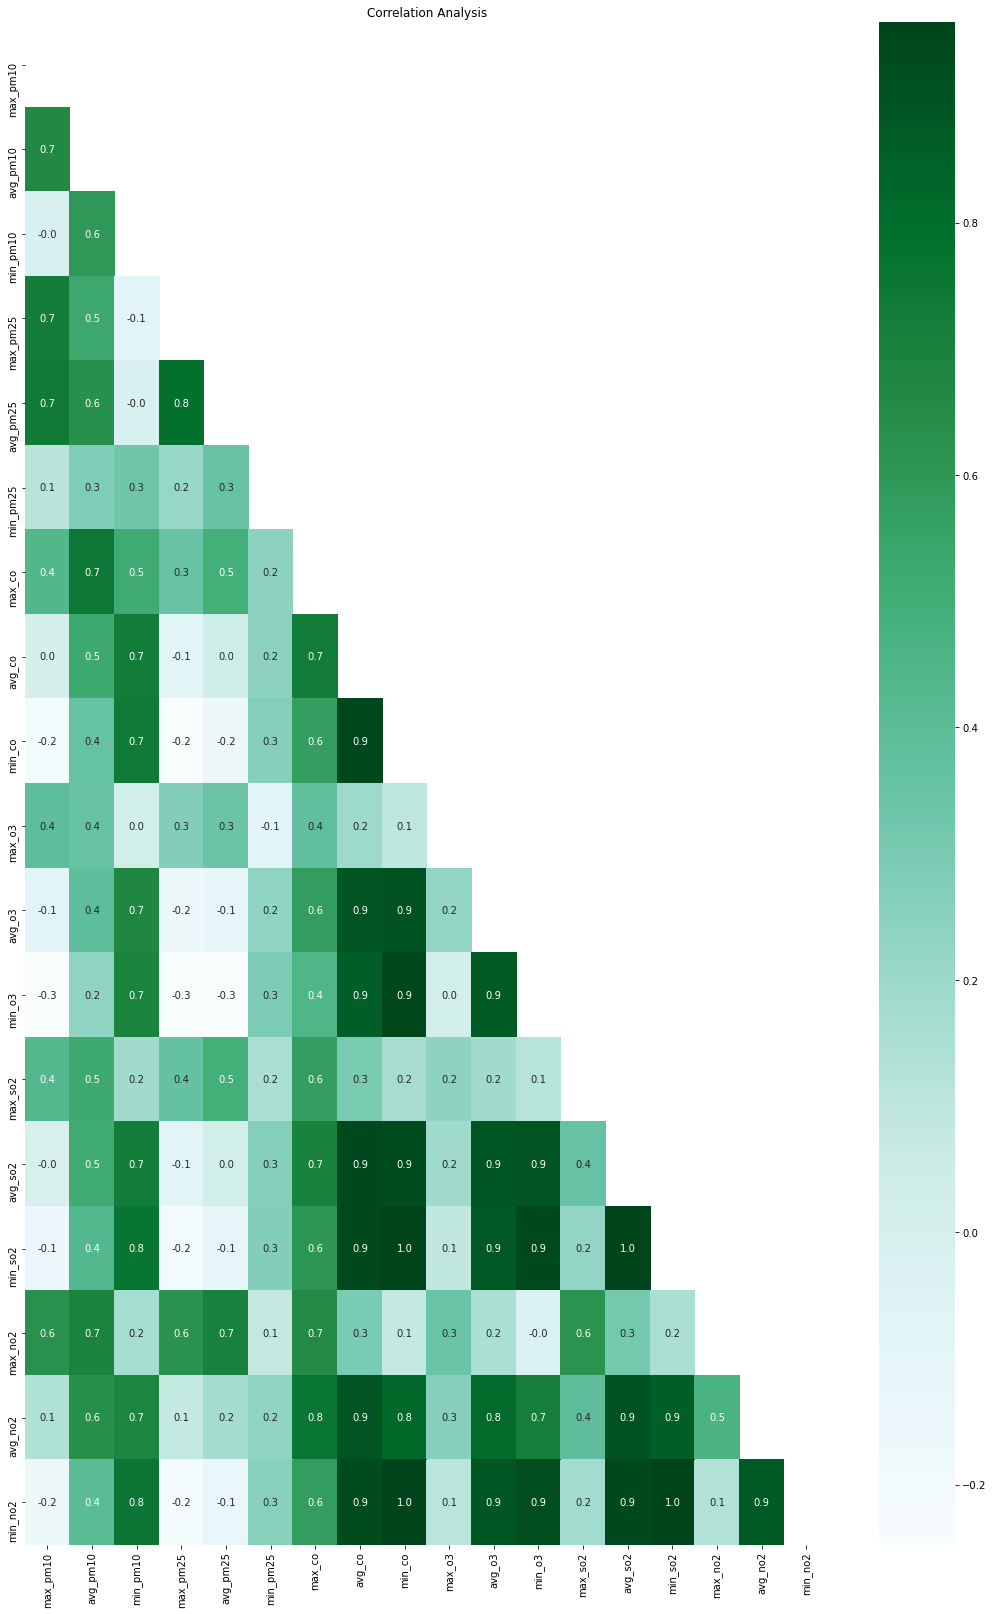

In [44]:
plt.figure(figsize=(18,28))

mask=np.triu(mumbai_18.corr(method='pearson'))
sns.heatmap(mumbai_18.corr(method='pearson'),
            annot=True,fmt='0.1f',
            mask=mask,
            robust=True,
            cmap='BuGn')
plt.title('Correlation Analysis')

Text(0.5, 0, 'Features')

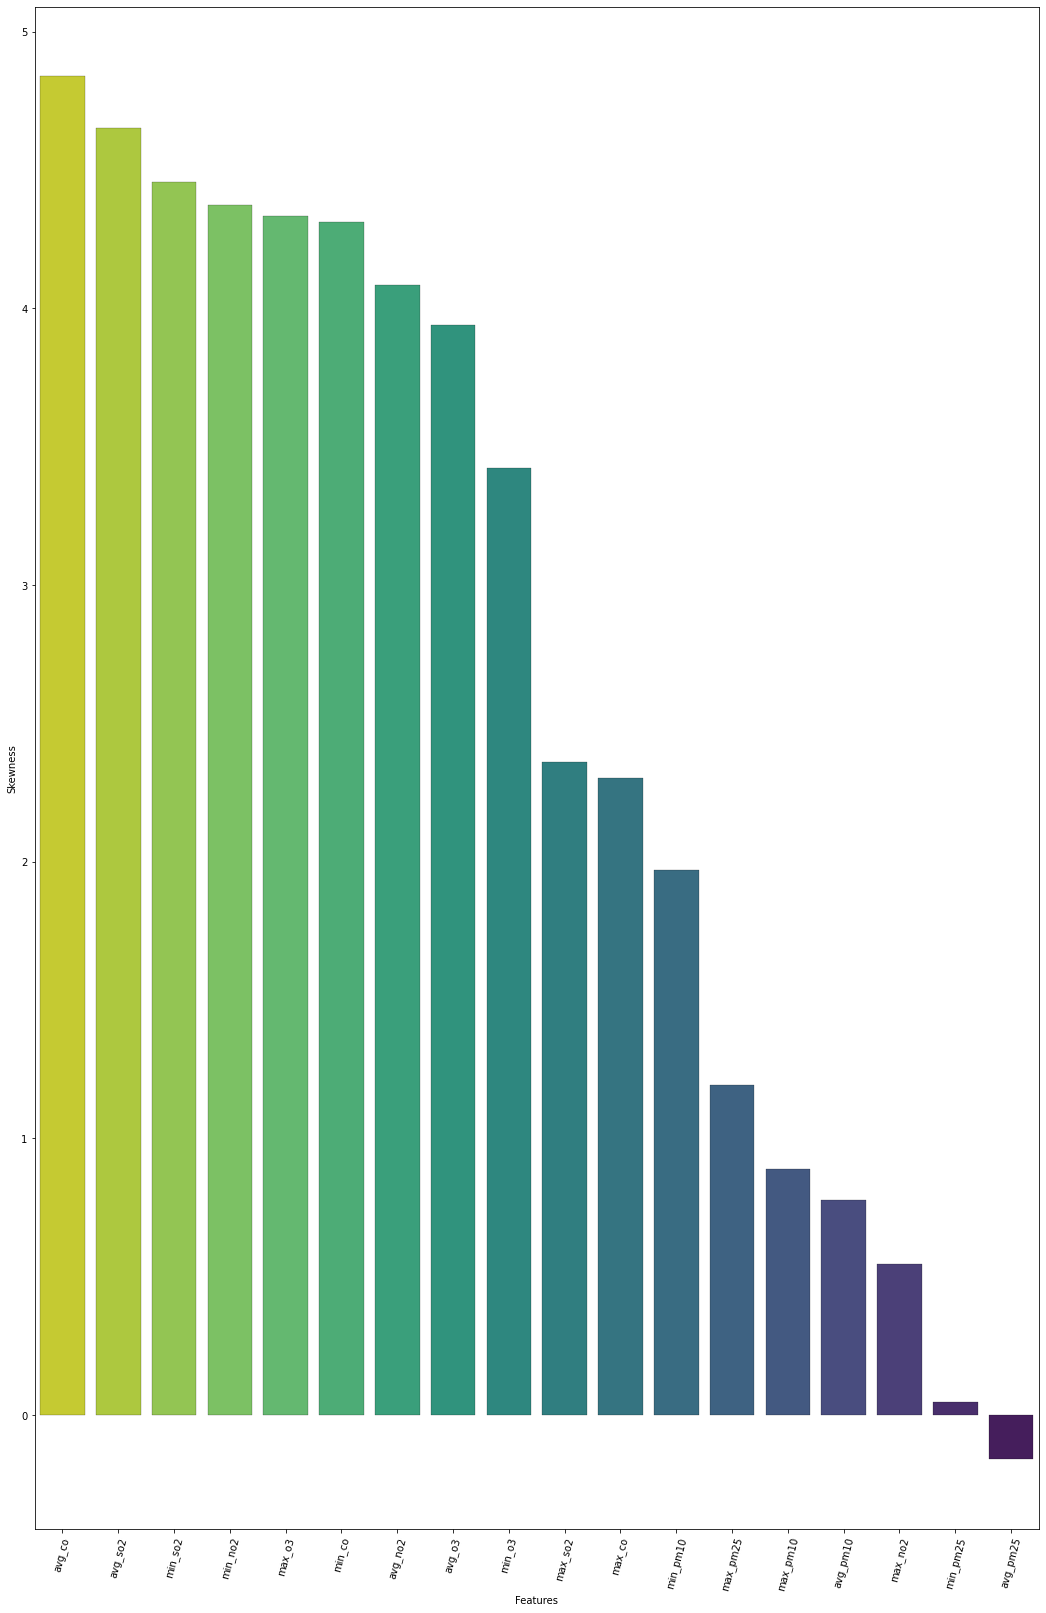

In [45]:
skew=pd.DataFrame(mumbai_18.skew().sort_values(ascending=False))
skew.columns=['Skewness']

plt.figure(figsize=(18,28))
plt.xticks(rotation=75)
sns.barplot(x=skew.index,y='Skewness',data=skew,
            edgecolor='black',
            linewidth=0.2,
            palette='viridis_r')
plt.xlabel('Features')

# Lucknow

In [67]:
luck = df[df['City'] == 'Lucknow']
luck.head()

,Date,Country,City,Specie,count,min,max,median,variance
541038,1/13/2018,IN,Lucknow,no2,70,14.7,54.1,27.5,924.17
541039,2/24/2018,IN,Lucknow,no2,118,1.1,59.5,18.7,2202.64
541040,3/7/2018,IN,Lucknow,no2,89,2.2,101.9,13.0,1848.20
541041,3/24/2018,IN,Lucknow,no2,120,5.2,44.6,17.3,584.07
541042,5/14/2018,IN,Lucknow,no2,95,5.4,65.3,19.2,708.61


In [68]:
pm = luck[luck['Specie'] == 'co'].copy() 
pm.head()

,Date,Country,City,Specie,count,min,max,median,variance
541377,2/13/2018,IN,Lucknow,co,116,2.0,23.2,8.0,236.51
541378,2/18/2018,IN,Lucknow,co,111,2.0,30.5,10.0,227.77
541379,5/1/2018,IN,Lucknow,co,89,0.1,19.7,5.3,160.52
541380,5/27/2018,IN,Lucknow,co,87,0.2,68.9,5.1,815.35
541381,7/1/2018,IN,Lucknow,co,84,1.0,41.7,6.2,587.38


In [69]:
pm = pd.pivot_table(data=pm, values=['min', 'max', 'median'], index='Date')
pm.head()

,max,median,min
Date,,,
1/1/2018,86.4,8.5,0.2
1/10/2018,29.7,13.1,2.2
1/11/2018,67.7,11.6,1.0
1/12/2018,24.3,10.5,0.2
1/13/2018,63.5,11.4,0.4


In [70]:
pm.rename(columns={'min':'min_{}'.format('pm10'), 'max':'max_{}'.format('pm10'), 'median':'avg_{}'.format('pm10')}, inplace=True)
pm.head()

,max_pm10,avg_pm10,min_pm10
Date,,,
1/1/2018,86.4,8.5,0.2
1/10/2018,29.7,13.1,2.2
1/11/2018,67.7,11.6,1.0
1/12/2018,24.3,10.5,0.2
1/13/2018,63.5,11.4,0.4


In [71]:
luck_18 = cleaning_function(df, 'Lucknow', parameters)
luck_18.head()

The parameter pm10 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,avg_o3,min_o3,max_so2,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
1/1/2018,404.0,209.0,94.0,86.4,8.5,0.2,14.7,8.2,5.6,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/10/2018,434.0,283.0,173.0,29.7,13.1,2.2,26.0,3.5,0.5,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/11/2018,714.0,289.0,183.0,67.7,11.6,1.0,25.1,5.7,1.3,20.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/12/2018,599.0,321.0,200.0,24.3,10.5,0.2,19.4,4.5,1.0,23.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/13/2018,858.0,321.0,188.0,63.5,11.4,0.4,30.1,6.1,2.1,27.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
list(luck_18.columns)

['max_pm25',
 'avg_pm25',
 'min_pm25',
 'max_co',
 'avg_co',
 'min_co',
 'max_o3',
 'avg_o3',
 'min_o3',
 'max_so2',
 'avg_so2',
 'min_so2',
 'max_no2',
 'avg_no2',
 'min_no2',
 'max_humidity',
 'avg_humidity',
 'min_humidity',
 'max_pressure',
 'avg_pressure',
 'min_pressure',
 'max_temperature',
 'avg_temperature',
 'min_temperature',
 'max_wind-speed',
 'avg_wind-speed',
 'min_wind-speed']

In [73]:
luck_18.isnull().sum()

max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity       130
avg_humidity       130
min_humidity       130
max_pressure       130
avg_pressure       130
min_pressure       130
max_temperature    130
avg_temperature    130
min_temperature    130
max_wind-speed     129
avg_wind-speed     129
min_wind-speed     129
dtype: int64

In [74]:
luck_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)

In [75]:
luck_18 = missingvalue_function(luck_18)
luck_18.isnull().sum()

max_pm25    0
avg_pm25    0
min_pm25    0
max_co      0
avg_co      0
min_co      0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

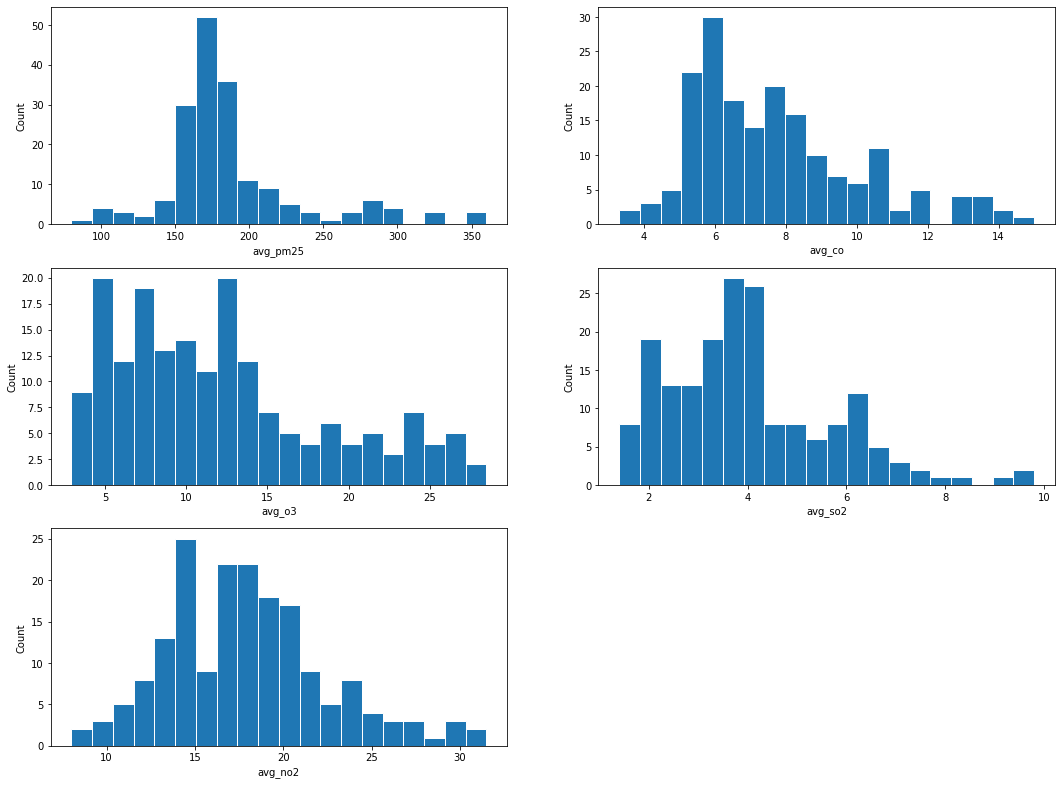

In [76]:
cols=['avg_pm25', 'avg_co', 'avg_o3', 'avg_so2', 'avg_no2']

fig=plt.figure(figsize=(18, 28))

for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    plt.hist(luck_18[col].dropna(),bins=20,edgecolor='white')
    plt.xlabel(col)
    plt.ylabel('Count')

Text(0.5, 1.0, 'Correlation Analysis')

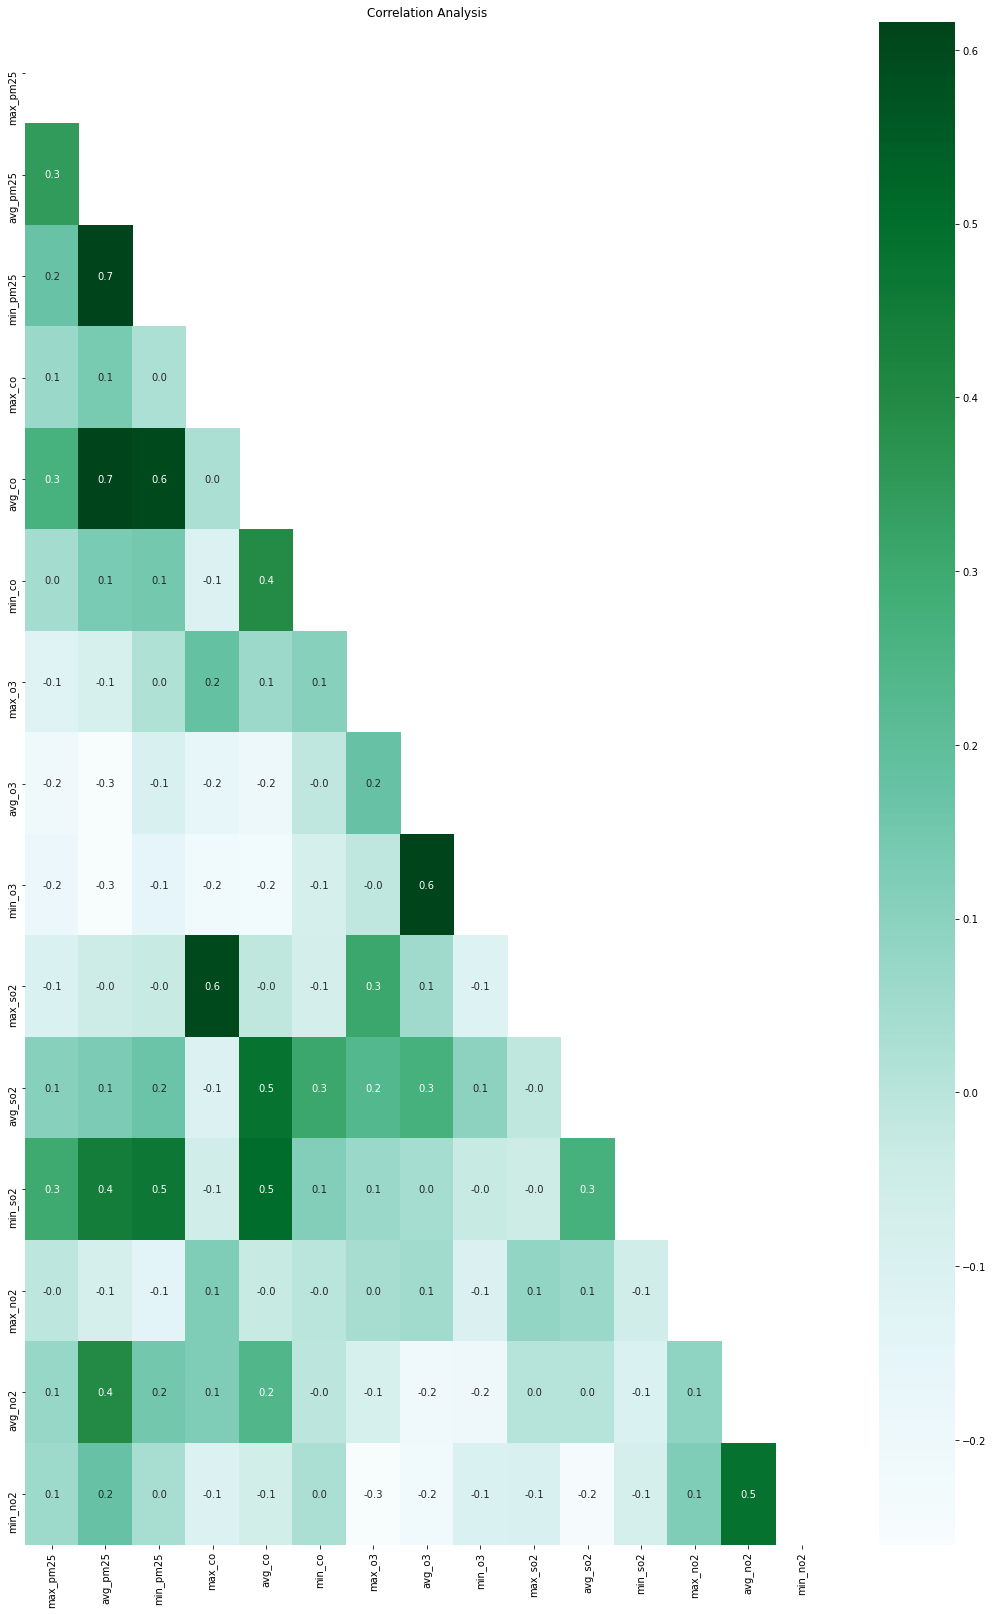

In [77]:
plt.figure(figsize=(18,28))

mask=np.triu(luck_18.corr(method='pearson'))
sns.heatmap(luck_18.corr(method='pearson'),
            annot=True,fmt='0.1f',
            mask=mask,
            robust=True,
            cmap='BuGn')
plt.title('Correlation Analysis')

Text(0.5, 0, 'Features')

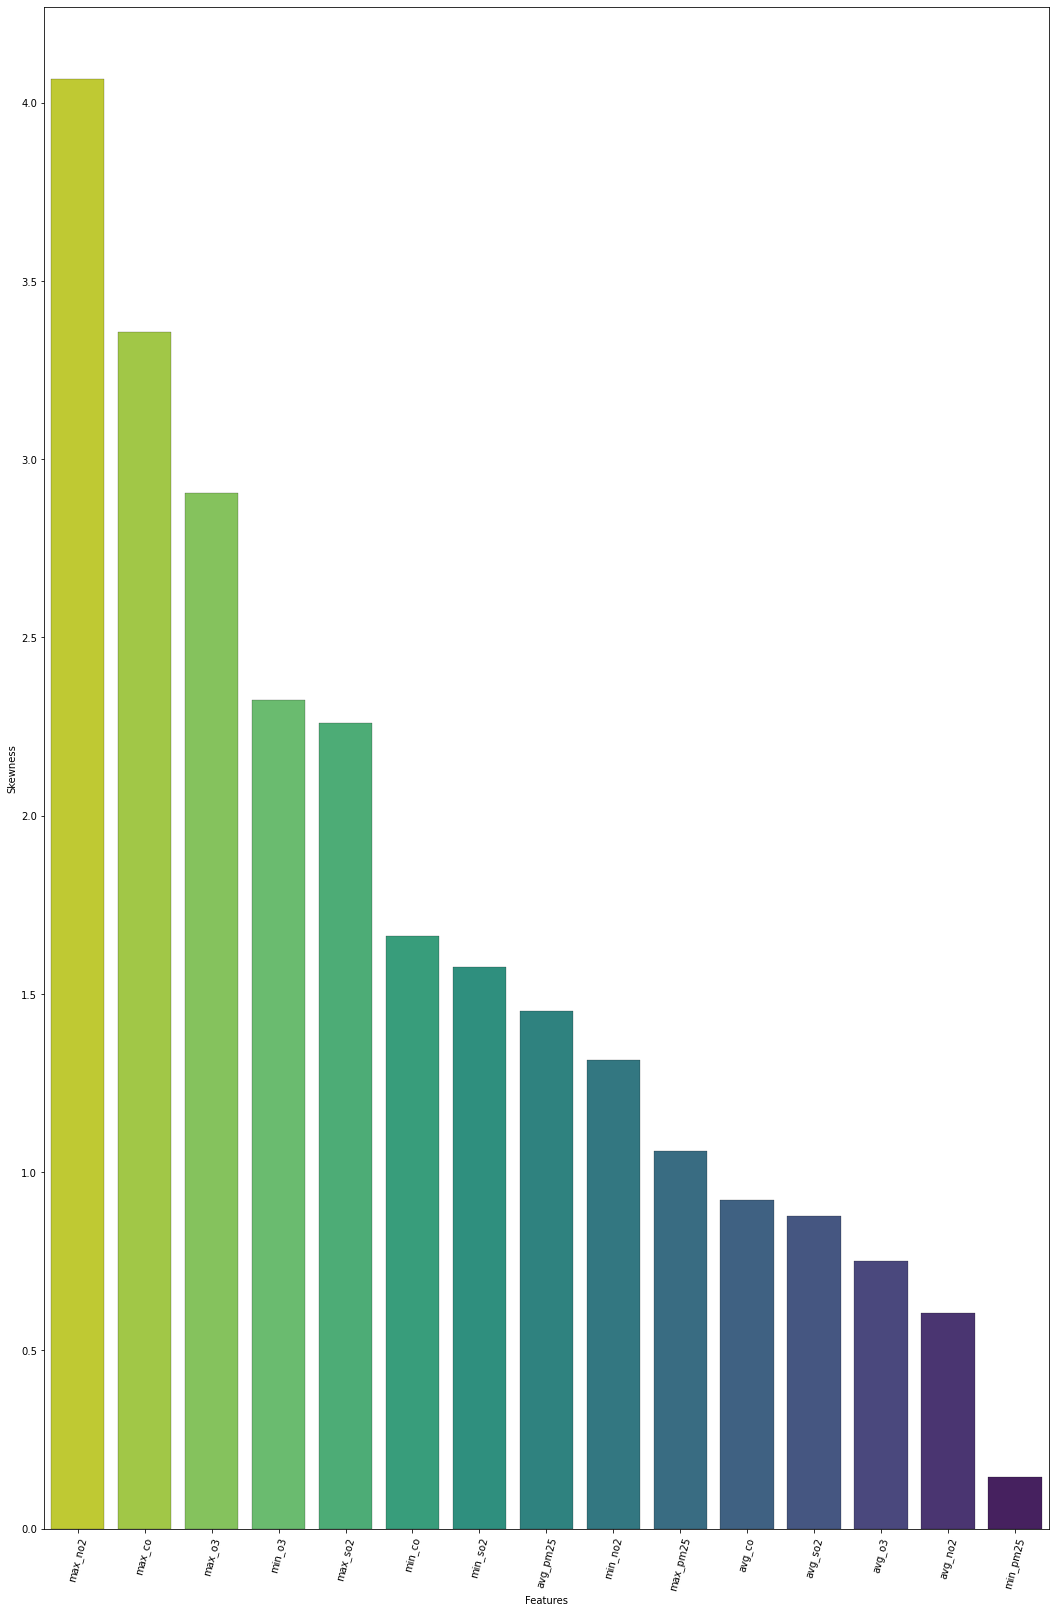

In [78]:
skew=pd.DataFrame(luck_18.skew().sort_values(ascending=False))
skew.columns=['Skewness']

plt.figure(figsize=(18,28))
plt.xticks(rotation=75)
sns.barplot(x=skew.index,y='Skewness',data=skew,
            edgecolor='black',
            linewidth=0.2,
            palette='viridis_r')
plt.xlabel('Features')